<a href="https://colab.research.google.com/github/lisabroadhead/machine-learning/blob/main/group_assigement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://course_report_production.s3.amazonaws.com/rich/rich_files/rich_files/2470/s300/cd-logo-blue-600x600.png" alt="Coding Dojo Logo" class="center" height="50">

# Data Cleaning

*Make a copy of this notebook to edit!*
```
File > Save a copy in Drive
```

We will use data on the Super Bowls. You can download the data [here](https://drive.google.com/file/d/1kWqIFO9LgVlMsYG9M9boRKCFiizpUB5o/view?usp=sharing).

</center>

**Why do we need to clean our data?**

> Garbage in, garbage out.

> Quality data beats fancy algorithms.

Overall, incorrect data is either removed, corrected, or imputed. ([*source*](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4))



Mount Data 
- Use the file URL below instead of mounting google drive. 

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
file_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSAwjsA-rwGlz_Bb0yIgC13scmhxQCjayvh-sp0v3lRMxejeem8ntBBcDpr4xbNNMiGzB8VGPKJzGJv/pub?output=csv"

**Import Libraries**

In [66]:
# Imports
import pandas as pd
import numpy as np

**Load Data & view first 5 rows**

In [67]:
# Load Data
df = pd.read_csv(file_url)
df.head()

,Unnamed: 0,Date,SB,Attendance,QB Winner,Coach Winner,Winner,Winning Pts,QB Loser,Coach Loser,...,City,State,Point Difference,Referee,Umpire,Head Linesman,Line Judge,Field Judge,Back Judge,Side Judge
0,0,15-Jan-67,I,61946,Bart Starr,Vince Lombardi,Green Bay Packers,35,Len Dawson,Hank Stram,...,Los Angeles,California,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,14-Jan-68,II,75546,Bart Starr,Vince Lombardi,Green Bay Packers,33,Daryle Lamonica,John Rauch,...,Miami,Florida,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,12-Jan-69,III,75389,Joe Namath,Weeb Ewbank,New York Jets,16,"Earl Morrall, Johnny Unitas",Don Shula,...,Miami,Florida,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,11-Jan-70,IV,80562,"Len Dawson, Mike Livingston",Hank Stram,Kansas City Chiefs,23,Joe Kapp,Bud Grant,...,New Orleans,Louisiana,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,17-Jan-71,V,79204,"Earl Morrall , Johnny Unitas",Don McCafferty,Baltimore Colts,16,Craig Morton,Tom Landry,...,Miami,FL,3,Norm Schachter,Paul Trepinski,Ed Marion,Jack Fette,Fritz Graf,Hugh Gamber,NaN


In [68]:
df.describe()

,Unnamed: 0,Attendance,Winning Pts,Losing Pts,Point Difference
count,53.000000,53.000000,53.000000,53.000000,53.000000
mean,26.018868,77901.358491,30.584906,16.452830,14.132075
std,15.476397,10773.028620,9.636537,7.252496,10.412710
min,0.000000,61946.000000,14.000000,3.000000,1.000000
25%,13.000000,71525.000000,24.000000,10.000000,5.000000
50%,26.000000,74107.000000,31.000000,17.000000,12.000000
75%,39.000000,80562.000000,35.000000,21.000000,19.000000
max,53.000000,103985.000000,55.000000,33.000000,45.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        53 non-null     int64 
 1   Date              53 non-null     object
 2   SB                53 non-null     object
 3   Attendance        53 non-null     int64 
 4   QB  Winner        53 non-null     object
 5   Coach Winner      53 non-null     object
 6   Winner            53 non-null     object
 7   Winning Pts       53 non-null     int64 
 8   QB Loser          53 non-null     object
 9   Coach Loser       53 non-null     object
 10  Loser             53 non-null     object
 11  Losing Pts        53 non-null     int64 
 12  MVP               53 non-null     object
 13  Stadium           53 non-null     object
 14  City              53 non-null     object
 15  State             53 non-null     object
 16  Point Difference  53 non-null     int64 
 17  Referee           

In [70]:
df.nunique()

Unnamed: 0          53
Date                52
SB                  52
Attendance          52
QB  Winner          33
Coach Winner        40
Winner              22
Winning Pts         28
QB Loser            40
Coach Loser         39
Loser               26
Losing Pts          21
MVP                 44
Stadium             31
City                20
State               11
Point Difference    28
Referee             30
Umpire              26
Head Linesman       27
Line Judge          28
Field Judge         35
Back Judge          31
Side Judge          27
dtype: int64

In [71]:
df.isna().sum()

Unnamed: 0           0
Date                 0
SB                   0
Attendance           0
QB  Winner           0
Coach Winner         0
Winner               0
Winning Pts          0
QB Loser             0
Coach Loser          0
Loser                0
Losing Pts           0
MVP                  0
Stadium              0
City                 0
State                0
Point Difference     0
Referee              4
Umpire               4
Head Linesman        5
Line Judge           4
Field Judge          4
Back Judge           4
Side Judge          12
dtype: int64

In [72]:
df.duplicated().sum()

0

## Irrelevant data

Irrelevant data is information that is unnecessary or unrelated to our task.

Typically, we want to remove this data - but **only if you are absolutely sure it is irrelevant**. When in doubt, consult a subject matter expert.

**What column seems unnecessary in this dataset? Drop it.**

In [73]:
df = df.drop(columns=["Unnamed: 0"])
df.head()

,Date,SB,Attendance,QB Winner,Coach Winner,Winner,Winning Pts,QB Loser,Coach Loser,Loser,...,City,State,Point Difference,Referee,Umpire,Head Linesman,Line Judge,Field Judge,Back Judge,Side Judge
0,15-Jan-67,I,61946,Bart Starr,Vince Lombardi,Green Bay Packers,35,Len Dawson,Hank Stram,Kansas City Chiefs,...,Los Angeles,California,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14-Jan-68,II,75546,Bart Starr,Vince Lombardi,Green Bay Packers,33,Daryle Lamonica,John Rauch,Oakland Raiders,...,Miami,Florida,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-Jan-69,III,75389,Joe Namath,Weeb Ewbank,New York Jets,16,"Earl Morrall, Johnny Unitas",Don Shula,Baltimore Colts,...,Miami,Florida,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11-Jan-70,IV,80562,"Len Dawson, Mike Livingston",Hank Stram,Kansas City Chiefs,23,Joe Kapp,Bud Grant,Minnesota Vikings,...,New Orleans,Louisiana,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17-Jan-71,V,79204,"Earl Morrall , Johnny Unitas",Don McCafferty,Baltimore Colts,16,Craig Morton,Tom Landry,Dallas Cowboys,...,Miami,FL,3,Norm Schachter,Paul Trepinski,Ed Marion,Jack Fette,Fritz Graf,Hugh Gamber,NaN


## Duplicate data

It is common that your data has data points that are repeated. Duplicates should be removed.

**Check for and remove any duplicates in this data.**

In [74]:
df.dtypes

Date                object
SB                  object
Attendance           int64
QB  Winner          object
Coach Winner        object
Winner              object
Winning Pts          int64
QB Loser            object
Coach Loser         object
Loser               object
Losing Pts           int64
MVP                 object
Stadium             object
City                object
State               object
Point Difference     int64
Referee             object
Umpire              object
Head Linesman       object
Line Judge          object
Field Judge         object
Back Judge          object
Side Judge          object
dtype: object

## Data types

You want your data to all be correct data types. There may be errors in your data causing numeric types to be read in as objects or dates that need to be converted to datetime objects. Additionally, we may want to convert our categorical variables to numbers.

**Check the datatypes & validate that they are what they should be. The `Date` column should be a DateTime type - fix this using `pd.to_datetime()` if is not the case!**

In [75]:
df['Date'] = pd.to_datetime(df['Date'])

In [76]:
df.dtypes

Date                datetime64[ns]
SB                          object
Attendance                   int64
QB  Winner                  object
Coach Winner                object
Winner                      object
Winning Pts                  int64
QB Loser                    object
Coach Loser                 object
Loser                       object
Losing Pts                   int64
MVP                         object
Stadium                     object
City                        object
State                       object
Point Difference             int64
Referee                     object
Umpire                      object
Head Linesman               object
Line Judge                  object
Field Judge                 object
Back Judge                  object
Side Judge                  object
dtype: object

Pandas is usually pretty good at converting date times.  However, when the year is 2 digits it can be ambiguous and Pandas may choose the wrong century.   

Check if this happened and if so, fix it.  Don't forget the `df.loc()` method.

You may have to convert it to a datetime again.

Hint: `df.loc[0, 'Date'] = '1967-01-15'`

## Syntax or spelling errors

Common syntax errors include extra white spaces at the beginning or end of strings or column names.

There may also be typos or inconsistencies in strings that need to be fixed. For example, if a state name is spelled out in one row and the abbreviation is used in another, we need to ensure consistency.

**Check for any inconsistencies in the strings of the `State` column and fix them.**

Don't forget the `df.replace()` method

In [77]:
df['State'].value_counts()

Florida       14
California    13
Louisiana     10
Texas          4
Arizona        3
Michigan       2
Minnesota      2
Georgia        2
FL             1
Indiana        1
New Jersey     1
Name: State, dtype: int64

In [78]:
df['State'] = df['State'].replace('FL', 'Florida')

In [79]:
df['State']

0     California
1        Florida
2        Florida
3      Louisiana
4        Florida
5      Louisiana
6     California
7          Texas
8      Louisiana
9        Florida
10    California
11     Louisiana
12       Florida
13    California
14     Louisiana
15      Michigan
16    California
17       Florida
18    California
19     Louisiana
20    California
21    California
22       Florida
23     Louisiana
24       Florida
25     Minnesota
26    California
27       Georgia
28       Florida
29       Arizona
30     Louisiana
31    California
32       Florida
33       Georgia
34       Florida
35     Louisiana
36    California
37         Texas
38       Florida
39      Michigan
40       Florida
41       Arizona
42       Florida
43       Florida
44         Texas
45       Indiana
46     Louisiana
47    New Jersey
48       Arizona
49    California
50         Texas
51     Minnesota
52    California
Name: State, dtype: object

In [80]:
# Here is a way in which you can store your string columns in a variable to use later in a for loop
# This code filters out the object type columns and creates a list of each of the column names as an index
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['SB', 'QB  Winner', 'Coach Winner', 'Winner', 'QB Loser', 'Coach Loser',
       'Loser', 'MVP', 'Stadium', 'City', 'State', 'Referee', 'Umpire',
       'Head Linesman', 'Line Judge', 'Field Judge', 'Back Judge',
       'Side Judge'],
      dtype='object')

In [81]:
# This for loop prints out each column name and then lists each category
# in the column along with the counts of each category
for col in str_cols:
  print(f'- {col}:')
  print(df[col].value_counts(dropna=False))
  print('\n\n')

- SB:
XXI        2
I          1
XXVIII     1
XXX        1
XXXI       1
XXXII      1
XXXIII     1
XXXIV      1
XXXV       1
XXXVI      1
XXXVII     1
XXXVIII    1
XXXIX      1
XL         1
XLI        1
XLII       1
XLIII      1
XLIV       1
XLV        1
XLVI       1
XLVII      1
XLVIII     1
XLIX       1
L          1
LI         1
XXIX       1
XXVII      1
II         1
XIII       1
III        1
IV         1
V          1
VI         1
VII        1
VIII       1
IX         1
X          1
XI         1
XII        1
XIV        1
XXVI       1
XV         1
XVI        1
XVII       1
XVIII      1
XIX        1
XX         1
XXII       1
XXIII      1
XXIV       1
XXV        1
LII        1
Name: SB, dtype: int64



- QB  Winner:
Tom Brady                       5
Terry Bradshaw                  4
Troy Aikman                     3
Joe Montana                     3
Bart Starr                      2
Roger Staubach                  2
Bob Griese                      2
Jim Plunkett                    2
John E

## Missing values

Missing values are very common and problematic in our data. There is no one right way to handle missing data. A few strategies include:
- Drop
- Impute

### Dropping missing values

If there are not very many missing values and they are missing completely at random, the fastest and easiest solution is to drop the rows with missing values.

Similarly, if most of a column is missing and the data is missing completely at random, it may be okay to drop the entire column

### Imputing missing values

Imputing means filling in the missing values based on some criterion. There are many methods to do this:
- Simple imputation including mean, median, or mode, or a specific constant value.

### Make sure to explain why you chose the method you did in a text cell.

**Check for missing data. Determine the best way to deal with this.**

In [82]:
df.head()

,Date,SB,Attendance,QB Winner,Coach Winner,Winner,Winning Pts,QB Loser,Coach Loser,Loser,...,City,State,Point Difference,Referee,Umpire,Head Linesman,Line Judge,Field Judge,Back Judge,Side Judge
0,2067-01-15,I,61946,Bart Starr,Vince Lombardi,Green Bay Packers,35,Len Dawson,Hank Stram,Kansas City Chiefs,...,Los Angeles,California,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2068-01-14,II,75546,Bart Starr,Vince Lombardi,Green Bay Packers,33,Daryle Lamonica,John Rauch,Oakland Raiders,...,Miami,Florida,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2069-01-12,III,75389,Joe Namath,Weeb Ewbank,New York Jets,16,"Earl Morrall, Johnny Unitas",Don Shula,Baltimore Colts,...,Miami,Florida,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2070-01-11,IV,80562,"Len Dawson, Mike Livingston",Hank Stram,Kansas City Chiefs,23,Joe Kapp,Bud Grant,Minnesota Vikings,...,New Orleans,Louisiana,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2071-01-17,V,79204,"Earl Morrall , Johnny Unitas",Don McCafferty,Baltimore Colts,16,Craig Morton,Tom Landry,Dallas Cowboys,...,Miami,Florida,3,Norm Schachter,Paul Trepinski,Ed Marion,Jack Fette,Fritz Graf,Hugh Gamber,NaN


In [83]:
df['Referee'].fillna('missing', inplace = True)

In [88]:
# df = df.groupby(['Umpire','Head Linesman','Line Judge']).fillna('missing', inplace = True)
df['Head Linesman'].fillna('missing', inplace = True)
df['Line Judge'].fillna('missing', inplace = True)

In [90]:
df.head()

,Date,SB,Attendance,QB Winner,Coach Winner,Winner,Winning Pts,QB Loser,Coach Loser,Loser,...,City,State,Point Difference,Referee,Umpire,Head Linesman,Line Judge,Field Judge,Back Judge,Side Judge
0,2067-01-15,I,61946,Bart Starr,Vince Lombardi,Green Bay Packers,35,Len Dawson,Hank Stram,Kansas City Chiefs,...,Los Angeles,California,25,missing,NaN,missing,missing,NaN,NaN,NaN
1,2068-01-14,II,75546,Bart Starr,Vince Lombardi,Green Bay Packers,33,Daryle Lamonica,John Rauch,Oakland Raiders,...,Miami,Florida,19,missing,NaN,missing,missing,NaN,NaN,NaN
2,2069-01-12,III,75389,Joe Namath,Weeb Ewbank,New York Jets,16,"Earl Morrall, Johnny Unitas",Don Shula,Baltimore Colts,...,Miami,Florida,9,missing,NaN,missing,missing,NaN,NaN,NaN
3,2070-01-11,IV,80562,"Len Dawson, Mike Livingston",Hank Stram,Kansas City Chiefs,23,Joe Kapp,Bud Grant,Minnesota Vikings,...,New Orleans,Louisiana,16,missing,NaN,missing,missing,NaN,NaN,NaN
4,2071-01-17,V,79204,"Earl Morrall , Johnny Unitas",Don McCafferty,Baltimore Colts,16,Craig Morton,Tom Landry,Dallas Cowboys,...,Miami,Florida,3,Norm Schachter,Paul Trepinski,Ed Marion,Jack Fette,Fritz Graf,Hugh Gamber,NaN


In [91]:
df.fillna({'Umpire':'missing', 'Field Judge': 'missing', 'Back Judge': 'missing', 'Side Judge': 'missing'}, inplace=True)

In [92]:
df.head()

,Date,SB,Attendance,QB Winner,Coach Winner,Winner,Winning Pts,QB Loser,Coach Loser,Loser,...,City,State,Point Difference,Referee,Umpire,Head Linesman,Line Judge,Field Judge,Back Judge,Side Judge
0,2067-01-15,I,61946,Bart Starr,Vince Lombardi,Green Bay Packers,35,Len Dawson,Hank Stram,Kansas City Chiefs,...,Los Angeles,California,25,missing,missing,missing,missing,missing,missing,missing
1,2068-01-14,II,75546,Bart Starr,Vince Lombardi,Green Bay Packers,33,Daryle Lamonica,John Rauch,Oakland Raiders,...,Miami,Florida,19,missing,missing,missing,missing,missing,missing,missing
2,2069-01-12,III,75389,Joe Namath,Weeb Ewbank,New York Jets,16,"Earl Morrall, Johnny Unitas",Don Shula,Baltimore Colts,...,Miami,Florida,9,missing,missing,missing,missing,missing,missing,missing
3,2070-01-11,IV,80562,"Len Dawson, Mike Livingston",Hank Stram,Kansas City Chiefs,23,Joe Kapp,Bud Grant,Minnesota Vikings,...,New Orleans,Louisiana,16,missing,missing,missing,missing,missing,missing,missing
4,2071-01-17,V,79204,"Earl Morrall , Johnny Unitas",Don McCafferty,Baltimore Colts,16,Craig Morton,Tom Landry,Dallas Cowboys,...,Miami,Florida,3,Norm Schachter,Paul Trepinski,Ed Marion,Jack Fette,Fritz Graf,Hugh Gamber,missing


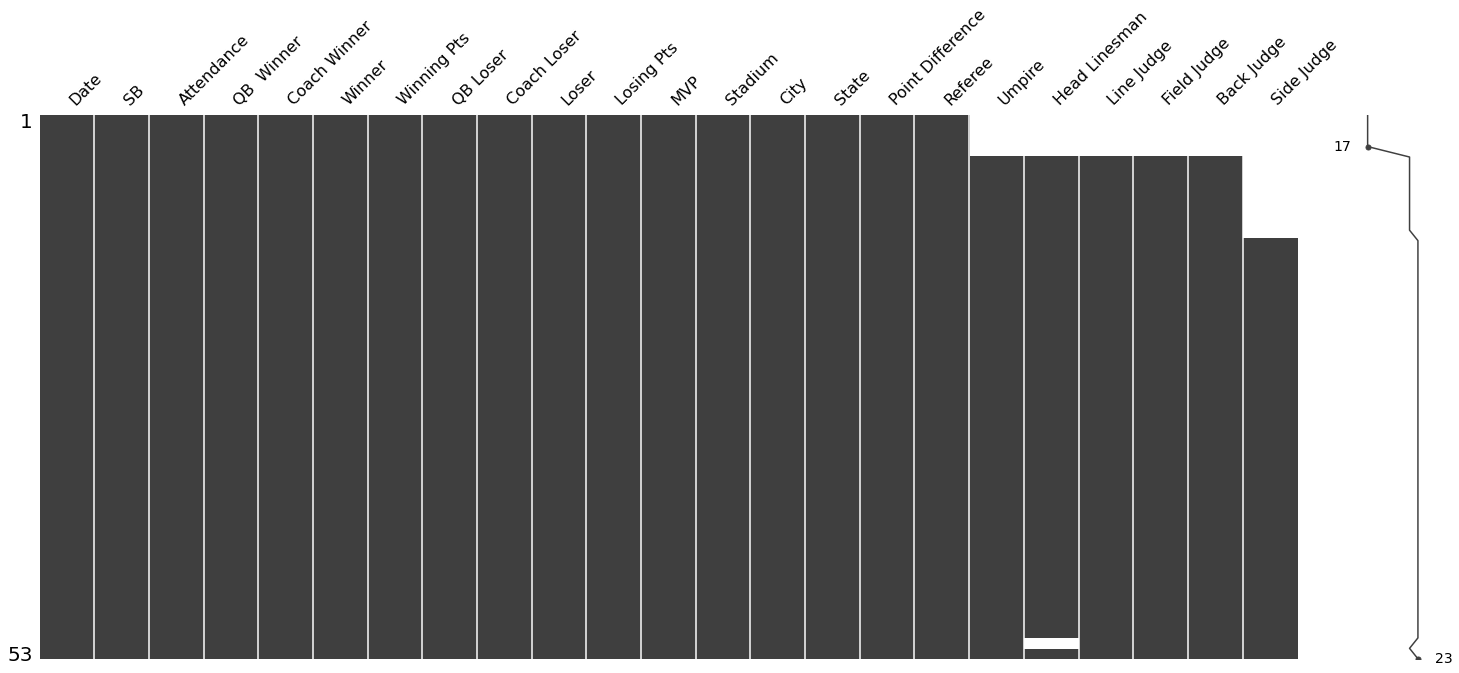

In [86]:
import missingno
# This output shows you were the missing data is in the dataframe.
# This white space represents data that is missing
missingno.matrix(df)

To drop a subset of your data, you may want to use `df2 = df.dropna(subset=['column names'], how = 'all)` to drop a subset of your data.

## Outliers

Outliers are values that are extremely higher or lower than all of the other values in that feature. In general, outliers should not be removed unless you have reason to believe it is an error in the dataset. It is important to investigate outliers, as some models are very sensitive to outliers.

**Check for outliers in the numeric columns using df.describe().**


# Exploratory Data Analysis - Questions to Answer

- For each question, display on the columns required to answer the question.

### Q1. Which 3 Superbowl #'s/years had the largest attendance?


- A1: 


### Q2. Which Stadiums hosted the Superbowl with the largest attendance?

- A2: 

### Q3: What city has hosted the most of superbowls? How many?

- A3:

### Q4: Of all of the superbowls hosted in the city from Q3, which SB # had the lowest attendance?

- A4: 

### Q5: What is the average point difference between teams, for each City? Which city has the highest average Point Difference?

- A5: